<a href="https://colab.research.google.com/github/adityadutt09/Phys498Projects/blob/main/Phys498_Project1_Quantum_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Building a Quantum Simulator to Implement Shor's Algorithm**

**Dirac Notation**

We first want to represent a quantum state of *n* qubits using *n* wires. We can represent a state using Dirac Notation that represents a state as the binary representation of the wires. 

To implement this concept through code, we use vectors. To do this, we need to come up with some functions that convert a state from dirac notation to vector notation and vice-versa. 

In general, a state of a qubit can be any linear combination of the $2^n$ possible states. 

For example: $|a> = 0.1|00> + 0.4|01> + 0.4|10> + 0.1|11>$ for a circuit having 2 qubits. (Notice that the coefficients of each term must sum up to 1)

More inforamtion on this notation can be found here: [Dirac Notation](https://docs.microsoft.com/en-us/azure/quantum/concepts-dirac-notation)

In [ ]:
#Importing some initial libraries
import numpy as np
import cmath
import math
import random
import matplotlib.pyplot as plt

In [ ]:
myState = [(np.sqrt(0.1), '00'),
           (np.sqrt(0.4), '01'),
           (-np.sqrt(0.5), '11')]
myState

[(0.31622776601683794, '00'),
 (0.6324555320336759, '01'),
 (-0.7071067811865476, '11')]

In [ ]:
def PrettyPrintBinary(myState):
  for val, key in myState:
    print(val, '|' + key + '> + ')

PrettyPrintBinary(myState)

0.31622776601683794 |00> + 
0.6324555320336759 |01> + 
-0.7071067811865476 |11> + 


In [ ]:
def PrettyPrintInteger(myState):
  for val, key in myState:
    int_key = int(key, 2)
    print(val, '|' + str(int_key) + '> + ')

PrettyPrintInteger(myState)

0.31622776601683794 |0> + 
0.6324555320336759 |1> + 
-0.7071067811865476 |3> + 


In [ ]:
#Testing the functions
myState2=[ (np.sqrt(0.1)*1.j, '101'), (np.sqrt(0.5), '000') , (-np.sqrt(0.4), '010' ) ] 
print("Printing in Binary form:")
PrettyPrintBinary(myState2) 
print()
print("Printing in Integer form:")
PrettyPrintInteger(myState2)

Printing in Binary form:
0.31622776601683794j |101> + 
0.7071067811865476 |000> + 
-0.6324555320336759 |010> + 

Printing in Integer form:
0.31622776601683794j |5> + 
0.7071067811865476 |0> + 
-0.6324555320336759 |2> + 


In [ ]:
def StatetoVec(myState, size):
  vector = np.zeros(2**size, dtype = np.complex128)
  for val, key in myState:
    vector[int(key,2)] = vector[int(key,2)] + val
  return vector

def VectoState(myVec):
  state = []
  for i in range(len(myVec)):
    key = format(i, 'b')
    state.append((myVec[i], key))
  return state

In [ ]:
print(StatetoVec(myState,2))
print(VectoState(StatetoVec(myState,2)))

[ 0.31622777+0.j  0.63245553+0.j  0.        +0.j -0.70710678+0.j]
[((0.31622776601683794+0j), '0'), ((0.6324555320336759+0j), '1'), (0j, '10'), ((-0.7071067811865476+0j), '11')]


Next we want to build a function that lets us compute the tensor product of two states. This will be explained in more detail in the next section. 

For more information on tensor products: [Tensor Product](https://en.wikipedia.org/wiki/Tensor_product)

In [ ]:
def tensorMe(matrices):
  result = [1]
  for i in range(len(matrices)):
    result = np.kron(result, matrices[i])
  return result

### **Creating the Atomic Gates:**

For Quantum Circuits there are many gates that can be constructed to perform various operations. However, there are a few standard gates, called Atomic Gates, out of which any other gate can be constructed. 

We derive three of these Atomic Gates here, namely the Hadamard Gate, the Phase Gate and the CNOT Gate.

More information on these gates can be found here: [Quantum Logic Gate](https://en.wikipedia.org/wiki/Quantum_logic_gate), [Lecture Notes on Quantum Math from CMU](https://www.cs.cmu.edu/~odonnell/quantum15/lecture02.pdf)


Gates are defined by what operation they have on a qubit coming into them.
For example, the Hadamrd Gate operates under the following mathematical relations:

$\begin{align} |0>  &-> \frac{1}{\sqrt{2}} ( |0> + |1> ) \\
|1>  &-> \frac{1}{\sqrt{2}} ( |0> - |1> ) \end{align}$

Thus, in matrix form, this can be represented as,
$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 
    1 & 1 \\
    1 & -1
  \end{pmatrix}$

which is much easier to work with.

In [ ]:
def HadamardArray(i, k):
  # this should apply Hadamard to wire i out of k wires
  size= 2**k
  myMatrix=np.zeros((size,size), dtype = np.complex128)
  matrices = [np.eye(2)]*k
  matrices[i] = (1/np.sqrt(2))*np.array([[1, 1], [1, -1]])
  myMatrix = tensorMe(matrices)
  return myMatrix

In [ ]:
#Test
HadamardArray(0,1)

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

Similarly, the idea of a phase gate is to rotate the qubit by a certain angle only if it is 1 and do nothing if it is 0. 

$\begin{align} |0> &-> |0> \\ |1> &-> e^{iθ}|1> \end{align}$

In matrix form this becomes,
$H = \begin{pmatrix} 
    1 & 1 \\
    1 & e^{i\theta}
  \end{pmatrix}$

In [ ]:
def PhaseArray(i, k, angle):
  # this should apply Hadamard to wire i out of k wires
  size= 2**k
  myMatrix=np.zeros((size,size), dtype = np.complex128)
  matrices = [np.eye(2)]*k
  matrices[i] = np.array([[1, 0], [0, cmath.exp(angle*1.j)]])
  myMatrix = tensorMe(matrices)
  return myMatrix

In [ ]:
#Test
PhaseArray(0,1, 0.45)

array([[1.       +0.j        , 0.       +0.j        ],
       [0.       +0.j        , 0.9004471+0.43496553j]])

Lastly, the CNOT Gate operates on two wires. It's basic principle is that if the control wire is 0, the target wire stays as it is, while if the control wire is 1, it will perform a NOT operation on the target wire. Thus, nothing changes in the control wire and nothing changes in the target wire if the control wire is |0>.

For the case when the control wire is above the target wire, we have:

$\begin{align} 
  |00> &-> |00> \\
  |01> &-> |01> \\
  |10> &-> |11> \\
  |11> &-> |10>
\end{align}$


In matrix form,
$H = \begin{pmatrix} 
  1 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 0 & 1 \\
  0 & 0 & 1 & 0
\end{pmatrix}$


(*Note: Since the CNOT gate operates on two wires, the dimensions of the matrix have to be atleast 4x4, whereas gates that operate only on one wire are 2x2*)

In [ ]:
def CNOTArray(controlWire,otherWire,totalWires):
  size = 2**totalWires
  myMatrix = np.zeros((size,size), dtype = np.complex128)
  
  matrices_control = [np.eye(2)]*totalWires
  matrices_X = [np.eye(2)]*totalWires

  matrices_control[controlWire] = np.array([[1,0],[0,0]])
  
  matrices_X[controlWire] = np.array([[0,0],[0,1]])
  matrices_X[otherWire] = np.array([[0,1],[1,0]])

  myMatrix = tensorMe(matrices_control) + tensorMe(matrices_X)

  return myMatrix

In [ ]:
#Test
CNOTArray(0,1,2)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

### **Unitary Matrices**:

Next, we define what is called a Unitary matrix that represents all the gates on a quantum circuit as one giant matrix acting on the output and giving us the output. This way of representing gates as matrices makes it easy to carry out calculations when multiple qubits are involved.

In [ ]:
def constructUnitary(matrices, size):
  result = np.eye(2**size)
  for matrix in matrices:
    result = matrix @ result
    
  return result

In [ ]:
def createGates(Input, size):
  #List to contain all the gates that form U
  gates = []
  measure = False
  for input in Input:
    #Phase Gate
    if(input[0] == 'P'):
      gates.append(PhaseArray(int(input[1]), size, float(input[2])))

    #Hadamard Gate
    if(input[0] == 'H'):
      gates.append(HadamardArray(int(input[1]), size))

    #CNOT Gate
    if(input[0] == 'CNOT'):
      gates.append(CNOTArray(int(input[1]), int(input[2]), size))

    if(input[0] == 'MEASURE'):
      measure = True
  return gates, measure

In [ ]:
def ReadInput(fileName):
        myInput_lines=open(fileName).readlines()
        myInput=[]
        numberOfWires=int(myInput_lines[0])
        for line in myInput_lines[1:]:
            myInput.append(line.split())
        return (numberOfWires,myInput)

In [ ]:
def count_elements(seq) -> dict:
     hist = {}
     for i in seq:
         hist[i] = hist.get(i, 0) + 1
     return hist

In [ ]:
def Measure(output):
  size = len(output)
  binaries = []
  for i in range(size):
    binaries.append(format(i, 'b'))
  
  weight = []
  for val in output:
    weight.append(abs(val)**2)

  result = [random.choices(binaries, weights = weight)[0] for x in range(100)]
  
  histogram = count_elements(result)
  #print(histogram)
  int_keys = [int(key,2) for key in list(histogram.keys())]
  plt.bar(int_keys, list(histogram.values()), width = 0.4)



In [ ]:
#Test
Measure(np.array([np.sqrt(0.5),np.sqrt(0.2),np.sqrt(0.1),np.sqrt(0.1)]))

In [ ]:
def InitialiseFromFile(filename):
  myInputlines = open(filename).readlines()
  input = []
  for line in myInputlines:
    input.append(line.split())
  
  input_size = len(myInputlines)
  input_vector = np.zeros(input_size)
  input_vector = [complex(float(input[i][0]), float(input[i][1])) for i in range(input_size)]
  
  return input_vector

In [ ]:
#Reading initstate from a file ('input.circuit')
def InitState(line):
  initial_vector = []
  if(line[0] == 'INITSTATE'):
    if(line[1] == 'FILE'):
      initial_vector = InitialiseFromFile(line[2])
      return initial_vector
      
    # if(line[1] == 'BASIS'):
      # InitialiseFromState(line[2])
  
  return initial_vector

In [ ]:
#Test
x, lines = ReadInput('input.circuit')
vector = InitState(lines[0])
print(vector)

In [ ]:
# import scipy.sparse
# print(scipy.sparse.csr_matrix(scipy.sparse.identity(2,dtype='complex')))


## **Simulator Ia**


In [ ]:
def SimulatorIa(gates, size, inputstate):
  U = constructUnitary(gates, size)

  result = np.copy(inputstate)
  output = U@result

  return output

In [ ]:
Input1_wires, Input1 = ReadInput("rand.circuit")
if(Input1[0][0] == 'INITSTATE'):
  InitState(Input1[0])
Input1_gates, measure1 = createGates(Input1, Input1_wires)

In [ ]:
#Default input state
default_inputvec = np.zeros(2**Input1_wires)
default_inputvec[0] = 1

outputvec1 = SimulatorIa(Input1_gates, Input1_wires, default_inputvec)
print(outputvec1)

In [ ]:
#Printing nicely
if(measure1):
  Measure(outputvec1)
else:
  outputstate1 = VectoState(outputvec1)
  PrettyPrintInteger(outputstate1)

In [ ]:
Input2_wires, Input2 = ReadInput("measure.circuit")
Input2_gates, measure2 = createGates(Input2, Input2_wires)

In [ ]:
#Default input state
default_inputvec = np.zeros(2**Input2_wires)
default_inputvec[1] = 1

outputvec2 = SimulatorIa(Input2_gates, Input2_wires, default_inputvec)
print(outputvec2)

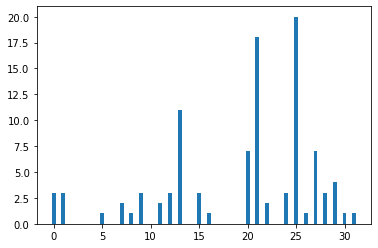

In [ ]:
#Printing nicely
if(measure2):
  Measure(outputvec2)
else:
  outputstate2 = VectoState(outputvec2)
  PrettyPrintInteger(outputstate2)

In [ ]:
#Code for third input: input.circuit
Input3_wires, Input3 = ReadInput("input.circuit")
input_vec3 = np.zeros(2**Input3_wires)

if (Input3[0][0] == 'INITSTATE'):
  input_vec3 = InitState(Input3[0])

# print(input_vec)
Input3_gates, measure3 = createGates(Input3[1:], Input3_wires)

In [ ]:
output_vec3 = SimulatorIa(Input3_gates, Input3_wires, input_vec3)

In [ ]:
#Printing nicely
if(measure3):
  Measure(output_vec3)
else:
  outputstate3 = VectoState(output_vec3)
  PrettyPrintInteger(outputstate3)

(0.15409919900412564-0.039023142873475684j) |0> + 
(0.04895105577891018-0.03001851549580138j) |1> + 
(-0.021319813075354997+0.0877478741409022j) |2> + 
(-0.11160918928703435-0.23332812293116628j) |3> + 
(-0.033901258348144725-0.009674003342578182j) |4> + 
(-0.01674606371011169-0.13026586952891345j) |5> + 
(-0.19592098529914298+0.009885177232733897j) |6> + 
(-0.09796097290238419+0.013475996833847575j) |7> + 
(-0.18082511268453239+0.014381045617727559j) |8> + 
(0.05382740960549372-0.06863464649457768j) |9> + 
(0.0010329113421168531-0.0034553374325647125j) |10> + 
(-0.02154097912106914+0.01744613535918276j) |11> + 
(-0.007195884290384046+0.15958103150789757j) |12> + 
(-0.22309649987486374+0.07462898841821952j) |13> + 
(-0.037893779801458916+0.005859520326027604j) |14> + 
(0.07390340399259634-0.05074229743090873j) |15> + 
(-0.1480464106395853+0.08745635006745285j) |16> + 
(-0.06328890454391892+0.25662035423302676j) |17> + 
(0.11691184507936053+0.013808709741378381j) |18> + 
(-0.02667646151

## **Simulator Ib**

In [ ]:
#We do not construct a unitary matrix but instead just calculate the output state after every gate:
def SimulatorIb(gates,size, inputstate):
  outputstate = np.zeros(2**size, dtype = np.complex128)
  result = inputstate

  for gate in gates:
    result = gate @ result

  outputstate = result
  return outputstate


In [ ]:
#For rand.circuit
inputstate = np.zeros(2**Input1_wires)
inputstate[0] = 1
output1_vec = SimulatorIb(Input1_gates,Input1_wires, inputstate)

if(measure1):
  print(Measure(output1_vec))
else:
  outputstate1 = VectoState(outputvec1)
  PrettyPrintInteger(outputstate1)

(0.14565796004368065+0.11348294333323078j) |0> + 
(0.04309755094683273-0.12184596055817097j) |1> + 
(-0.0001782615750044818+0.08005459383129254j) |2> + 
(0.05035629868818652-0.007282489799443278j) |3> + 
(0.07232672559216342-0.022619270303906338j) |4> + 
(-0.03444784817538653-0.04222821092998375j) |5> + 
(0.05394795241192348+0.0089543810281979j) |6> + 
(0.0017934458673294204-0.026754015134267277j) |7> + 
(0.13464628848368854-0.1256031965657913j) |8> + 
(-0.1040997208563847-0.06762381241864739j) |9> + 
(0.010652323173449761+0.0709456424309128j) |10> + 
(0.0315367895599324-0.035377797720121604j) |11> + 
(0.007920474449196606+0.2978985122057254j) |12> + 
(0.19608126814268637-0.05835344971980608j) |13> + 
(-0.11306530101030747-0.022843082802562524j) |14> + 
(0.025670653436355967+0.07563944999428003j) |15> + 
(0.0014746900019901594-0.0364590321264683j) |16> + 
(-0.012673925486559915+0.005514371048822488j) |17> + 
(-0.08205100536822746+0.015513990179495498j) |18> + 
(0.016011739671690253+0.0

In [ ]:
#For measure.circuit
inputstate2 = np.zeros(2**Input2_wires)
inputstate2[0] = 1
output2_vec = SimulatorIb(Input2_gates, Input2_wires, inputstate2)

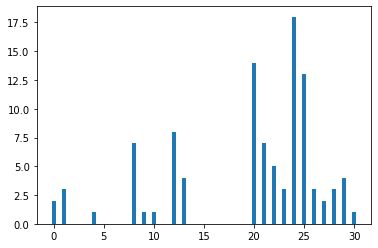

In [ ]:
if(measure2):
  Measure(output2_vec)
else:
  outputstate2 = VectoState(outputvec2)
  PrettyPrintInteger(outputstate2)

In [ ]:
#For input.circuit
output3_vec = SimulatorIb(Input3_gates, Input3_wires, input_vec3)

#Printing nicely
if(measure3):
  Measure(output_vec3)
else:
  outputstate3 = VectoState(output_vec3)
  PrettyPrintInteger(outputstate3)

(0.15409919900412564-0.039023142873475684j) |0> + 
(0.04895105577891018-0.03001851549580138j) |1> + 
(-0.021319813075354997+0.0877478741409022j) |2> + 
(-0.11160918928703435-0.23332812293116628j) |3> + 
(-0.033901258348144725-0.009674003342578182j) |4> + 
(-0.01674606371011169-0.13026586952891345j) |5> + 
(-0.19592098529914298+0.009885177232733897j) |6> + 
(-0.09796097290238419+0.013475996833847575j) |7> + 
(-0.18082511268453239+0.014381045617727559j) |8> + 
(0.05382740960549372-0.06863464649457768j) |9> + 
(0.0010329113421168531-0.0034553374325647125j) |10> + 
(-0.02154097912106914+0.01744613535918276j) |11> + 
(-0.007195884290384046+0.15958103150789757j) |12> + 
(-0.22309649987486374+0.07462898841821952j) |13> + 
(-0.037893779801458916+0.005859520326027604j) |14> + 
(0.07390340399259634-0.05074229743090873j) |15> + 
(-0.1480464106395853+0.08745635006745285j) |16> + 
(-0.06328890454391892+0.25662035423302676j) |17> + 
(0.11691184507936053+0.013808709741378381j) |18> + 
(-0.02667646151

## **Simulator Ic**

In [ ]:
import scipy.sparse

In [ ]:
def SimulatorIc(gates, size, Inputstate):
  sparse_gates = [scipy.sparse.csr_matrix(gate) for gate in gates]
  outputstate = scipy.sparse.csr_matrix(np.zeros(2**size, dtype = np.complex128))
  # outputstate.tocsr()
  inputstate = scipy.sparse.csr_matrix(Inputstate)
  result = inputstate
  for sgate in sparse_gates:
    result = sgate.multiply(result)
      
  return outputstate

In [ ]:
#For rand.circuit
inputstate = np.zeros(2**Input1_wires)
inputstate[0] = 1
output1_vec = SimulatorIc(Input1_gates, Input1_wires, inputstate)

if(measure1):
  print(Measure(output1_vec))
else:
  outputstate1 = VectoState(outputvec1)
  PrettyPrintInteger(outputstate1)

(0.14565796004368065+0.11348294333323078j) |0> + 
(0.04309755094683273-0.12184596055817097j) |1> + 
(-0.0001782615750044818+0.08005459383129254j) |2> + 
(0.05035629868818652-0.007282489799443278j) |3> + 
(0.07232672559216342-0.022619270303906338j) |4> + 
(-0.03444784817538653-0.04222821092998375j) |5> + 
(0.05394795241192348+0.0089543810281979j) |6> + 
(0.0017934458673294204-0.026754015134267277j) |7> + 
(0.13464628848368854-0.1256031965657913j) |8> + 
(-0.1040997208563847-0.06762381241864739j) |9> + 
(0.010652323173449761+0.0709456424309128j) |10> + 
(0.0315367895599324-0.035377797720121604j) |11> + 
(0.007920474449196606+0.2978985122057254j) |12> + 
(0.19608126814268637-0.05835344971980608j) |13> + 
(-0.11306530101030747-0.022843082802562524j) |14> + 
(0.025670653436355967+0.07563944999428003j) |15> + 
(0.0014746900019901594-0.0364590321264683j) |16> + 
(-0.012673925486559915+0.005514371048822488j) |17> + 
(-0.08205100536822746+0.015513990179495498j) |18> + 
(0.016011739671690253+0.0

In [ ]:
#For measure.circuit
inputstate2 = np.zeros(2**Input2_wires)
inputstate2[0] = 1
output2_vec = SimulatorIc(Input2_gates, Input2_wires, inputstate2)

In [ ]:
if(measure2):
  Measure(output2_vec)
else:
  outputstate2 = VectoState(outputvec2)
  PrettyPrintInteger(outputstate2)

In [ ]:
#For input.circuit
output3_vec = SimulatorIc(Input3_gates, Input3_wires, input_vec3)

#Printing nicely
if(measure3):
  Measure(output_vec3)
else:
  outputstate3 = VectoState(output_vec3)
  PrettyPrintInteger(outputstate3)

(0.15409919900412564-0.039023142873475684j) |0> + 
(0.04895105577891018-0.03001851549580138j) |1> + 
(-0.021319813075354997+0.0877478741409022j) |2> + 
(-0.11160918928703435-0.23332812293116628j) |3> + 
(-0.033901258348144725-0.009674003342578182j) |4> + 
(-0.01674606371011169-0.13026586952891345j) |5> + 
(-0.19592098529914298+0.009885177232733897j) |6> + 
(-0.09796097290238419+0.013475996833847575j) |7> + 
(-0.18082511268453239+0.014381045617727559j) |8> + 
(0.05382740960549372-0.06863464649457768j) |9> + 
(0.0010329113421168531-0.0034553374325647125j) |10> + 
(-0.02154097912106914+0.01744613535918276j) |11> + 
(-0.007195884290384046+0.15958103150789757j) |12> + 
(-0.22309649987486374+0.07462898841821952j) |13> + 
(-0.037893779801458916+0.005859520326027604j) |14> + 
(0.07390340399259634-0.05074229743090873j) |15> + 
(-0.1480464106395853+0.08745635006745285j) |16> + 
(-0.06328890454391892+0.25662035423302676j) |17> + 
(0.11691184507936053+0.013808709741378381j) |18> + 
(-0.02667646151

### **Comparing Time and RAM Results**

In [ ]:
def randomCircuitGenerator(n):
  circuit = []

  for i in range(10):
    gate = np.random.choice(['H', 'P', 'CNOT'])
    if(gate == 'H'):
      circuit.append(['H', np.random.randint(n), n])
    if(gate == 'P'):
      circuit.append(['P', np.random.randint(n), n, np.pi/2])
    if(gate == 'CNOT'):
      circuit.append(['CNOT', np.random.randint(n), n-2, n])

  return circuit

In [ ]:
#Inputs
input6 = randomCircuitGenerator(6)
input7 = randomCircuitGenerator(7)
input8 = randomCircuitGenerator(8)
input9 = randomCircuitGenerator(9)
input10 = randomCircuitGenerator(10)
input11 = randomCircuitGenerator(11)
input12 = randomCircuitGenerator(12)
# input13 = randomCircuitGenerator(13)

#Gates
# gates6, measure6 = createGates(input6, 6)
# gates7, measure7 = createGates(input7, 7)
# gates8, measure8 = createGates(input8, 8)
# gates9, measure9 = createGates(input9, 9)
# gates10, measure10 = createGates(input10, 10)
# gates11, measure11 = createGates(input11, 11)
# gates12, measure12 = createGates(input12, 12)
# gates13, measure13 = createGates(input13, 13)

#Input vectors
# in6 = np.zeros(2**6, dtype = np.complex128)
# in6[0] = 1
# in7 = np.zeros(2**7, dtype = np.complex128)
# in7[0] = 1
# in8 = np.zeros(2**8, dtype = np.complex128)
# in8[0] = 1
# in9 = np.zeros(2**9, dtype = np.complex128)
# in9[0] = 1
# in10 = np.zeros(2**10, dtype = np.complex128)
# in10[0] = 1
# in11 = np.zeros(2**11, dtype = np.complex128)
# in11[0] = 1
# in12 = np.zeros(2**12, dtype = np.complex128)
# in12[0] = 1
# in13 = np.zeros(2**13, dtype = np.complex128)
# in13[0] = 1

In [ ]:
import time

### **Graphing runtime vs qubits**

In [ ]:
#Output vectors for SimulatorIa
# %time out6a = SimulatorIa(gates6, 6, in6)
# %time out7a = SimulatorIa(gates7, 7, in7)
# %time out8a = SimulatorIa(gates8, 8, in8)
# %time out9a = SimulatorIa(gates9, 9, in9)
# %time out10a = SimulatorIa(gates10, 10, in10)
# %time out11a = SimulatorIa(gates11, 11, in11)
# %time out12a = SimulatorIa(gates12, 12, in12)

#Outputvectors for SimulatorIb
# %time out6b = simulatorIb(gates6, 6, in6)
# %time out7b = simulatorIb(gates7, 7, in7)
# %time out8b = simulatorIb(gates8, 8, in8)
# %time out9b = SimulatorIb(gates9, 9, in9)
# %time out10b = SimulatorIb(gates10, 10, in10)
# %time out11b = SimulatorIb(gates11, 11, in11)
# %time out12b = simulatorIb(gates12, 12, in12)

#Outputvectors for SimulatorIc
# %time out6c = SimulatorIc(gates6, 6, in6)
# %time out7c = SimulatorIc(gates7, 7, in7)
# %time out8c = SimulatorIc(gates8, 8, in8)
# %time out9c = SimulatorIc(gates9, 9, in9)
# %time out10c = SimulatorIc(gates10, 10, in10)
# %time out11c = SimulatorIc(gates11, 11, in11)
# %time out12c = SimulatorIc(gates12, 12, in12)

#Output vectors for SimulatorII
# %time out6ii = SimulatorII(6, input6)
# %time out7ii = SimulatorII(7, input7)
# %time out8ii = SimulatorII(8, input8)
# %time out9ii = SimulatorII(9, input9)
# %time out10ii = SimulatorII(10, input10)
# %time out11ii = SimulatorII(11, input11)
# %time out12ii = SimulatorII(12, input12)


CPU times: user 8.3 ms, sys: 5.68 ms, total: 14 ms
Wall time: 14.5 ms


In [ ]:
pip install memory_profiler

In [ ]:
%load_ext memory_profiler

In [ ]:
#RAM USAGE
# %memit out6a = SimulatorIa(gates6, 6, in6)
# %memit out7a = SimulatorIa(gates7, 7, in7)
# %memit out8a = SimulatorIa(gates8, 8, in8)
# %memit out9a = SimulatorIa(gates9, 9, in9)
# %memit out10a = SimulatorIa(gates10, 10, in10)
# %memit out11a = SimulatorIa(gates11, 11, in11)
# %memit out12a = SimulatorIa(gates12, 12, in12)


# %memit out6b = SimulatorIb(gates6, 6, in6)
# %memit out7b = SimulatorIb(gates7, 7, in7)
# %memit out8b = SimulatorIb(gates8, 8, in8)
# %time out9b = SimulatorIb(gates9, 9, in9)
# %time out10b = SimulatorIb(gates10, 10, in10)
# %time out11b = SimulatorIb(gates11, 11, in11)
# %memit out12b = SimulatorIb(gates12, 12, in12)

# %memit out6c = SimulatorIc(gates6, 6, in6)
# %memit out7c = SimulatorIc(gates7, 7, in7)
# %memit out8c = SimulatorIc(gates8, 8, in8)
# %time out9c = SimulatorIc(gates9, 9, in9)
# %time out10c = SimulatorIc(gates10, 10, in10)
# %time out11c = SimulatorIc(gates11, 11, in11)
# %memit SimulatorIc(gates12, 12, in12)

# %memit out6ii = SimulatorII(6, input6)
# %memit out7ii = SimulatorII(7, input7)
# %memit out8ii = SimulatorII(8, input8)
# %memit out9ii = SimulatorII(9, input9)
# %memit out10ii = SimulatorII(10, input10)
# %memit out11ii = SimulatorII(11, input11)
%memit out12ii = SimulatorII(12, input12)

peak memory: 3895.54 MiB, increment: 3504.06 MiB


In [ ]:
timesIa = [0.00604, 0.0203, 0.058, 0.398, 1.03, 17.7, 131] # 6,7,8, 9, 10, 11, 12 qubits in seconds
timesIb = [0.00216, 0.00278, 0.0115, 0.0207, 0.0867, 0.327, 0.696] # 6,7,8,9,10,11,12 qubits in seconds
timeIc = [0.0114, 0.0137, 0.0176, 0.0611, 0.0952, 0.547, 1.38] # 6,7,8,9,10,11,12 qubits in seconds
timesII = [0.0422, 0.166, 0.847, 2.28, 10.1, 26.8, 347] # 6,7,8,9,10,11,12 qubits in seconds


#RAMS
ramIa = [1945.23, 1946.00, 1949.55, 2729.60]  #6,7,8,12
ramIb = [2730.04, 2730.07, 2730.08, 2729.92]  #6,7,8,12
ramIc = [2730.54, 2730.56, 2730.58, 2730.63]  #6,7,8,12
ramII = [93.03, 163.82, 174.85, 216.48, 393.27, 1051.64, 3895.54] #6,7,8,9,10,11,12

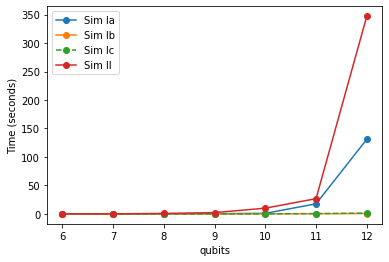

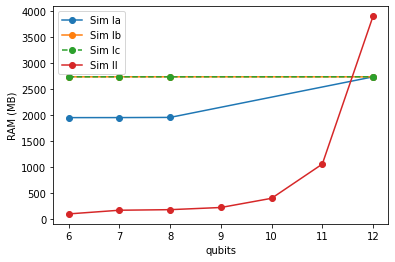

In [ ]:
# %Graph of 
range = [6,7,8,9,10,11,12]
plt.figure()
plt.plot(range, timesIa, 'o-', label = 'Sim Ia')
plt.plot(range, timesIb, 'o-', label = 'Sim Ib')
plt.plot(range, timeIc, 'o--', label = 'Sim Ic')
plt.plot(range, timesII, 'o-', label = 'Sim II')
plt.ylabel('Time (seconds)')
plt.xlabel('qubits')
plt.legend()

plt.figure()
plt.plot([6,7,8,12], ramIa, 'o-', label = 'Sim Ia' )
plt.plot([6,7,8,12], ramIb, 'o-', label = 'Sim Ib')
plt.plot([6,7,8,12], ramIc, 'o--', label = 'Sim Ic')
plt.plot(range, ramII, 'o-', label = 'Sim II')
plt.ylabel('RAM (MB)')
plt.xlabel('qubits')
plt.legend()

## **Simulator II**

In [ ]:
myState=[
  (np.sqrt(0.1), '00'),
  (np.sqrt(0.4), '01') , 
  (-np.sqrt(0.5), '11' )
]

print([element[1] for element in myState])

['00', '01', '11']


### **Defining new Gate functions for Simulator II**

In [ ]:
def Hadamard(inWire,numWires,inputState):
  H = HadamardArray(inWire, numWires)
  new_state = newState(inputState, numWires, H)
  return RemoveDuplicates(new_state)

def Phase(inWire, theta, numWires, inputState):
  P = PhaseArray(inWire, numWires, theta)
  new_state = newState(inputState, numWires, P)
  return RemoveDuplicates(new_state)

def CNOT(controlWire, targetWire, numWires, inputState):
  C = CNOTArray(controlWire, targetWire, numWires)
  new_state = newState(inputState, numWires, C)
  return RemoveDuplicates(new_state)

def newState(inputState, numWires, gate):
  outputState = []
  for element in inputState:
    element_vec = np.zeros(2**numWires, dtype=np.complex128)
    element_vec[int(element[1],2)] = element[0]
    output_vec = gate @ element_vec
    output_state = VectoState(output_vec)
    for v, k in output_state:
      outputState.append((v,k))
  return outputState

def RemoveDuplicates(myState):
  keys = []
  keys = list(set([element[1] for element in myState]))
  duplicate = dict.fromkeys(keys, 0)
  result = []
  
  for element in myState:
    duplicate[element[1]] = duplicate[element[1]] + element[0]
  for i in duplicate.keys():
    if(duplicate[i] != 0):
      result.append((duplicate[i], i))
  #result = [(duplicate[i],i) for i in duplicate if duplicate[i] is not 0]

  #result.sort(key = lambda x: x[1]) 
  return list(SortList(result))

def SortList(s): 
    lst = len(s) 
    for i in range(0, lst):   
        for j in range(0, lst-i-1): 
            if (int(s[j][1],2) > int(s[j + 1][1],2)): 
                temp = s[j] 
                s[j]= s[j + 1] 
                s[j + 1]= temp 
    return s 
  
#Tests
# H_check = Hadamard(0,2,myState)
# print(H_check)

# P_check = RemoveDuplicates(Phase(0, np.pi,2, myState))
# print(P_check)

# C_check = RemoveDuplicates(CNOT(0,1,2,myState))
# print(C_check)
# print(StateToVec(C_check,2))
# default_vecstate = np.zeros(2**5)
# default_vecstate[0] = 1
# print(VectoState(default_vecstate))

### **Defining the Simulator II**

In [ ]:
def SimulatorII(Input_wires, Input):
  measure = False
  input_vec = np.zeros(2**Input_wires, dtype=np.complex128)

  if (Input[0][0] == 'INITSTATE'):
    input_vec = InitState(Input[0])
    Input = Input[1:]
  else:
    input_vec[1] = 1
  
  state = VectoState(input_vec)
  
  for input in Input:
    if(input[0] == 'H'):
      state = Hadamard(int(input[1]), Input_wires, state)
    
    if(input[0] == 'P'):
      state = Phase(int(input[1]), float(input[2]), Input_wires, state)
    
    if(input[0] == 'CNOT'):
      state = CNOT(int(input[1]), int(input[2]), Input_wires, state)
    
    if(input[0] == 'FUNC'):
      if(input[3] == 'xyModN'):
        temp = state[input[1]:input[1] + input[2]]
        y = StatetoVec(temp, Input_wires)
        U = buildUnitaryMatrix(input[4],input[5])
        # state[input[1]:input[1]+input[2]] = xyModN(y, U) 
        state = xyModN(y, U) 
    
    if(input[0] == 'MEASURE'):
      measure = True
  
  # if (measure):
  #   Measure(StatetoVec(output,Input_wires))
  # else:
  #   # print(output)  
  #   PrettyPrintInteger(output)

  return state

In [ ]:
#rand.circuit
Input_wires, Input = ReadInput('rand.circuit')
SimulatorII(Input_wires, Input)

In [ ]:
#measure.circuit
Input2_wires, Input2 = ReadInput('measure.circuit')
SimulatorII(Input2_wires, Input2)

In [ ]:
#input.circuit
Input3_wires, Input3 = ReadInput('input.circuit')
SimulatorII(Input3_wires, Input3)

# **Non-Atomic Gates**

In [ ]:
#Not Gate: H -> P(pi) -> H
#For 1 wire: NOT = HadamardArray(0,1) @ PhaseArray(0,1,np.pi) @ HadamardArray(0,1)
def NOT(i,k):
  return HadamardArray(i,k) @ PhaseArray(0,1,np.pi) @ HadamardArray(i,k)

#Rz Gate: P(theta/2) -> NOT -> P(-theta/2) -> NOT
def Rz(i,k,theta):
  return  NOT(i,k) @ PhaseArray(-theta*0.5) @ NOT(i,k) @ PhaseArray(theta*0.5)

#C-Rz Gate: P(theta/2)(1) -> CNOT(0,1) -> P(-theta/2)(1) -> CNOT(0,1)
def CRz(control,target,k, theta):
  return  CNOTArray(control, target, k) @ PhaseArray(target,k, -theta*0.5) @ CNOTArray(control,target,k) @ PhaseArray(target,k, theta*0.5)

#C-Phase Gate: CRz(0,1,2,theta) -> Phase(0,2, theta/2)
def CPhase(control, target, k, phase):
  return  PhaseArray(control, k, 0.5*phase) @ CRz(control,target,k, phase)

#SWAP Gate: CNOT(0,1) -> CNOT(1,0) -> CNOT(0,1)
def SWAP(control, target,k):
  return CNOTArray(control, target,k) @ CNOTArray(target, control, k) @ CNOTArray(control, target, k)

In [ ]:
def PreCompiler(wires, input, outputfilename):
  f = open(outputfilename, "w")
  f.write(str(wires) + '\n')
  for line in input:
    if(line[0] == 'H'):
      f.write('H' + '\t' + line[1] + '\n')
    
    if(line[0] == 'P'):
      f.write('P' + '\t' + line[1] + '\t' + line[2] + '\n')
    
    if(line[0] == 'CNOT'):
      f.write('CNOT' + '\t' + line[1] + '\t' + line[2] + '\n')
    
    if(line[0] == 'NOT'):
      f.write('H' + '\t' + line[1] + '\n')
      f.write( 'P' + '\t' + line[1] + '\t' + 'pi'+ '\n')
      f.write('H' + '\t' + line[1]+ '\n')
    
    if(line[0] == 'CPHASE'):
      f.write('P' + '\t' + line[2] +'\t' + str(0.5*float(line[3]))+ '\n')
      f.write('CNOT' +'\t' + line[1] + '\t' + line[2]+ '\n')
      f.write('P' +'\t' + line[2] +'\t' + str(-0.5*float(line[3]))+ '\n')
      f.write('CNOT' +'\t' + line[1] +'\t' + line[2]+ '\n')
      f.write('P' +'\t' + line[1] +'\t' + str(0.5*float(line[3]))+ '\n')
    
    if(line[0] == 'SWAP'):
      f.write('CNOT' +'\t' + line[1] +'\t' + line[2]+ '\n')
      f.write('CNOT' +'\t' + line[2] +'\t' + line[1]+ '\n')
      f.write('CNOT' +'\t' + line[1] +'\t' + line[2]+ '\n')

  f.close()

In [ ]:
#Pre-compile
inputwires, input = ReadInput('NonAtomicGates.txt')
PreCompiler(inputwires, input, 'NonAtomicCompiled.txt')

In [ ]:
Input_wires, Input = ReadInput('NonAtomicCompiled.txt')
SimulatorII(Input_wires, Input)

[((0.7071067811865475+0j), '1000000'),
 ((0.7071067811865474-1.3877787807814457e-17j), '101000000')]

## **Phase Estimation**

In [ ]:
def convertBintoTheta(number):
  theta_val = 0.0
  for i in range(len(number)-1):
    theta_val = theta_val + (1/(2**(i+1)))*float(number[i])
  return theta_val

Text(0.5, 1.0, 'Counting wires = 1')

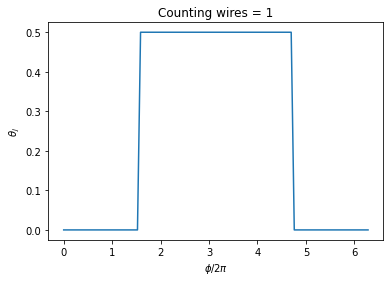

In [ ]:
#Using SimulatorII to do Phase Estimation
#Example 1: H(0,2) -> CPhase(0,1,2, phi) -> H(0,2) for range of phis
numWires = 2
initial_vector = np.zeros(numWires**2)
initial_vector[1] = 1
thetas = []

phi = np.linspace(0,2*np.pi, 100)
Ulist = [HadamardArray(0,numWires) @ CPhase(0,1,numWires, phase) @ HadamardArray(0,numWires) for phase in phi]
output_list = [(U @ initial_vector) for U in Ulist]
#output_list = SimulatorII()
theta_list = [np.argmax(output) for output in output_list]
binary_theta_list = [format(theta,'b') for theta in theta_list]
thetas = [convertBintoTheta(num) for num in binary_theta_list]

plt.plot(phi,thetas)
plt.xlabel('$\phi/2\pi$')
plt.ylabel('$\\theta_{j}$')
plt.title('Counting wires = 1')

# print(thetas)
# print(binary_theta_list)
# for i  in range(len(output_list)):
#   output_list[i] = [x for x in output_list[i] if x!= 0]

In [ ]:
phi2 = 2*np.pi*0.1432394487827058
U = HadamardArray(0,2) @ CPhase(0,1,2, phi2) @ HadamardArray(0,2)
initial_vector = np.zeros(2**2)
initial_vector[1] = 1
thetas = []
output = U @ initial_vector
absoutput = [abs(i)**2 for i in output]

print(absoutput)

[0.0, 0.8108049841353318, 0.0, 0.1891950158646677]


<BarContainer object of 4 artists>

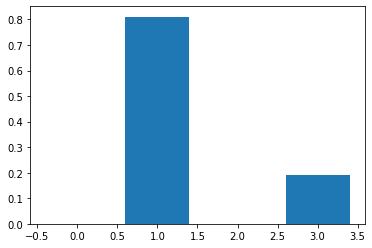

In [ ]:
plt.figure()
plt.bar(range(2**2), absoutput)
# plt.annotate("$\phi/2\pi$", (1, 4))

Text(0.5, 1.0, 'Counting wires = 2')

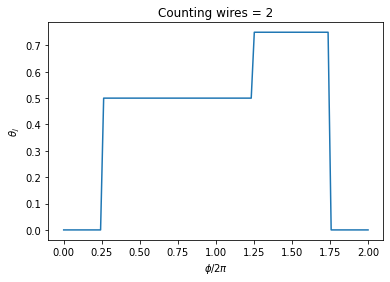

In [ ]:
#Example 2: H(0,3) -> H(0,3) -> CPhase(1,2,3,theta) -> CPhase(0,2,3,theta) -> CPhase(0,2,3,theta) -> H(0,3) -> CPhase(0,1,3, -pi/2) -> H(1,3) -> SWAP(0,1)
numWires = 3
initial_vector = np.zeros(2**numWires, dtype = np.complex128)
initial_vector[1] = 1
thetas = []

phi = np.linspace(0,2*np.pi, 100)

U1 = HadamardArray(1,3) @ HadamardArray(0,3)
U3 = SWAP(0,1,3) @ HadamardArray(1,3) @ CPhase(0,1,3, -np.pi/2) @ HadamardArray(0,3)
U2 = [CPhase(0,2,3, phase) @ CPhase(0,2,3,phase) @ CPhase(1,2,3, phase) for phase in phi]
Ulist = U3 @ U2 @ U1

output_list = [U @ initial_vector for U in Ulist]
# output_list_abs = []
# for output in output_list:
#   output_list_abs.append([abs(i)*abs(i) for i in output])

theta_list = [np.argmax(out) for out in output_list]
binary_theta_list = [format(theta,'b') for theta in theta_list]
thetas = [convertBintoTheta(num) for num in binary_theta_list]

plt.plot(phi/(1*np.pi), thetas)
plt.xlabel('$\phi/2\pi$')
plt.ylabel('$\\theta_{j}$')
plt.title('Counting wires = 2')
# print(thetas)
# histogram = count_elements(thetas)
# plt.bar(, list(histogram.values()), width = 0.4)


In [ ]:
phase = phi2
U = SWAP(0,1,3) @ HadamardArray(1,3) @ CPhase(0,1,3, -np.pi/2) @ HadamardArray(0,3) @ CPhase(0,2,3, phase) @ CPhase(0,2,3,phase) @ CPhase(1,2,3, phase) @ HadamardArray(1,3) @ HadamardArray(0,3)
initial_vector = np.zeros(2**3, dtype = np.complex128)
initial_vector[1] = 1

output = U @ initial_vector
absoutput = [abs(i)**2 for i in output]

print(absoutput)

[0.0, 0.3132941966760944, 0.0, 0.5471256297543488, 0.0, 0.07310475597736166, 0.0, 0.06647541759219412]


<BarContainer object of 8 artists>

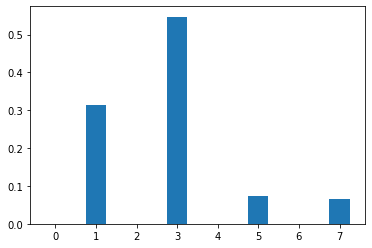

In [ ]:
plt.bar(range(2**3), absoutput, width = 0.5)

# **Quantum Fourier Transform**

In [ ]:
QFT3wires, QFT3input = ReadInput('QFT3.txt')
PreCompiler(QFT3wires, QFT3input, 'QFT3Compiled.txt')

In [ ]:
wires, Input = ReadInput('QFT3Compiled.txt')
SimulatorII(wires, Input)

In [ ]:
# Test
Testinput = []
Testwires, Testinput = ReadInput('QFT3Test.txt')
PreCompiler(Testwires, Testinput, 'QFT3TestCompiled.txt')
testWires, testInput = ReadInput('QFT3TestCompiled.txt')
SimulatorII(testWires, testInput)

In [ ]:
def buildIQFT(numWires):
  input = []
  for i in range(numWires):
    input.append(['H', str(i)])

    for j in range(i+1, numWires):
      input.append(['CPHASE', str(i), str(j), str(float( -1*np.pi/(2**(j-i))))])

  return input

def buildQFT(IQFT):
  inverse = IQFT[::-1]
  for i in range(len(inverse)):
    if(inverse[i][0] == 'CPHASE'):
      inverse[i][3] = str(-1*float(inverse[i][3]))
  
  return inverse

# buildIQFT(6)
# buildIQFT(3)

In [ ]:
build_input = buildQFT(buildIQFT(3))
PreCompiler(3, build_input, 'buildQFT3Compiled.txt')
QFTwires, QFTinput = ReadInput('buildQFT3Compiled.txt')
SimulatorII(QFTwires,QFTinput)

In [ ]:
input = buildQFT(buildIQFT(5))
input.insert(0,['INITSTATE', 'FILE', 'myInputState.txt'])
input

In [ ]:
SimulatorII(5,input)

# **Building a General Phase Estimation Circuit**

In [ ]:
#numWires = 6, totalWires = 7
def buildPECircuit(numWires, unitary):
  circuit = []
  
  #Hadamards in the start
  circuit = [['H', str(i)] for i in range(numWires)]

  #Control-Unitaries
  for i in range(numWires):
    #if(unitary[0] == 'CPHASE'):
    for j in range(2**i):
      circuit.append(['CPHASE', str(numWires - i - 1), str(numWires), str(unitary[1])])

  #Inverse QFT
  input = buildIQFT(numWires)
  for elem in input:
    circuit.append(elem)
  
  #Reverse the output
  pos = 0
  while(pos < numWires/2):
    circuit.append(['SWAP', str(pos), str(numWires - pos - 1)])
    pos = pos + 1 

  return circuit

In [ ]:
#2 WIRE PE using QFT
phi = np.linspace(0, 2*np.pi, 100)
preinput_list = [buildPECircuit(6, ('CPHASE', phase)) for phase in phi]
postinput_list = []

for i in range(len(preinput_list)):
  PreCompiler(6, preinput_list[i], 'QFT.txt')
  w, lst = ReadInput('QFT.txt')
  postinput_list.append(lst)

preinput_list[0]

In [ ]:
output_list = []
theta_list = []
binary_theta_list = []
thetas = []

output_list = [StatetoVec(SimulatorII(7, post), 7) for post in postinput_list]

output_list_abs = []
for output in output_list:
  output_list_abs.append([abs(i)*abs(i) for i in output])

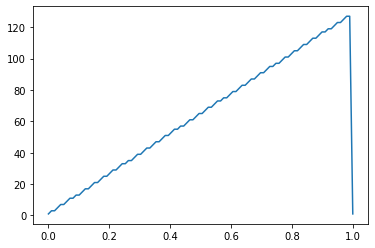

In [ ]:
theta_list = [np.argmax(output) for output in output_list_abs]
plt.plot(phi/(2*np.pi), theta_list)

In [ ]:
#Histogram
phase = phi2
preinput = buildPECircuit(6, ('CPHASE', phase))
postinput = []
for i in range(len(preinput_list)):
  PreCompiler(6, preinput_list[i], 'QFT.txt')
  w, lst = ReadInput('QFT.txt')
  postinput = lst

output = StatetoVec(SimulatorII(7, postinput), 7)
outputabs = [abs(i)**2 for i in output]

[0.0, 0.9999999999999978, 0.0, 6.2291782026259035e-30, 0.0, 1.6094008709282737e-30, 0.0, 6.965961338364082e-31, 0.0, 3.920266879495297e-31, 0.0, 2.54027073441307e-31, 0.0, 1.7091687474036209e-31, 0.0, 1.3214351100128153e-31, 0.0, 7.615736350051845e-32, 0.0, 8.204224472359787e-32, 0.0, 9.039672905698641e-32, 0.0, 5.674424988058286e-32, 0.0, 3.7622524987592884e-32, 0.0, 4.2263700235751546e-32, 0.0, 3.543834068211285e-32, 0.0, 3.3254729102276306e-32, 0.0, 4.804470858006643e-32, 0.0, 2.731760238663872e-32, 0.0, 2.55408332065754e-32, 0.0, 2.3246959513665205e-32, 0.0, 1.9179921754623357e-32, 0.0, 2.0385525468773812e-32, 0.0, 1.7481211565115202e-32, 0.0, 1.8352495659321207e-32, 0.0, 2.507743428394925e-32, 0.0, 1.6917664301610555e-32, 0.0, 7.170312632085979e-33, 0.0, 1.5938602863719424e-32, 0.0, 1.602159935518996e-32, 0.0, 1.5327598448224507e-32, 0.0, 1.3208037993608842e-32, 0.0, 1.503379373962361e-32, 0.0, 8.718440623123486e-33, 0.0, 1.503379373962353e-32, 0.0, 1.2012989413546332e-32, 0.0, 1.

<BarContainer object of 128 artists>

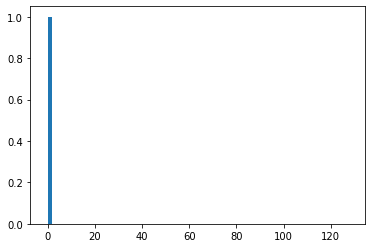

In [ ]:
print(outputabs)
plt.bar(range(2**7), outputabs, width = 2)

In [ ]:
#Using superposition of eigenstates
phi = 0.5
psi_0 = np.zeros(2**7)
psi_0[0] = 1

psi_1 = np.zeros(2**7)
psi_1[1] = 1
initial_vector = np.sqrt(0.3)*psi_0 + np.sqrt(0.7)*psi_1

preinput = buildPECircuit(6, ('CPHASE', phi))
postinput = []
for i in range(len(preinput_list)):
  PreCompiler(7, preinput_list[i], 'QFT.txt')
  w, lst = ReadInput('QFT.txt')
  postinput = lst

output = StatetoVec(SimulatorII(7, postinput), 7)
outputabs = [abs(i)**2 for i in output]

print(outputabs)
plt.bar(range(2**7), outputabs, width = 0.5)


# **Classical Shor's Algorithm** (Incomplete)

In [ ]:
import sympy
import numpy as np
import math
import numpy.linalg as la
from fractions import Fraction

In [ ]:
def BaseTests(N):
  #Check if N is prime
  if(sympy.isprime(N)):
    return False
  
  #Check if N is even
  if(N % 2 == 0): 
    return False

  #Check if N = x^a
  if N == 1:
    return False
 
  for i in range(2, int(np.sqrt(N)) + 1) :
    val = np.log(N) / np.log(i)
    if (round((val - int(val)),8) < 0.00000001):
      return False
  
  return True

In [ ]:
#Checking minimum r
def FindMinimumR(N,x):
  for r in range(1, N):
    if(r % 2 == 0 and (x**r - 1)%N == 0):
      return r
  
  print('r Failed')
  return -1

In [ ]:
def findFactors(N):
  if(BaseTests(N) is not True):
    print('Does not satisfy Base Tests')
    return []

  #Choose a random x
  x = 1 + np.random.randint(np.sqrt(N)+1)
  print('x is:' + str(x))

  #Check gcd(x,N) == 1
  if(math.gcd(x,N) is not 1):
    print('x and N are not co-prime')
    return []
  
  U = buildUnitaryMatrix(x,N)
  eigvals, eigvecs = la.eig(U)
  phase_eig = np.angle(eigvals)/(2*np.pi)
  
  print('Before Multiplying by r:')
  print("Phase Eig", np.unique(phase_eig))

  random_eigval = np.random.choice(phase_eig)
  # print(random_eigval)
  d = Fraction(random_eigval).limit_denominator(N)
  r = d.denominator
  print('R', r)
  
  # r = FindMinimumR(N, x)
  # print('r is: ' + str(r))
  # if(r < 1):
  #   print('r is not valid')
  #   return []

  print('After Multiplying by r:')
  print(np.unique(phase_eig * r))

  factors = []
  
  #Check if r is valid
  if(r >= 1):
    print('r is:' + str(r))
    factors = [math.gcd( int((x**(r/2) - 1)) % N, N), math.gcd( int((x**(r/2) + 1)) % N , N)]
  else:
    print('r could not be found')
    return []

  # print(factors)
  #Check if factors are other than 1,N
  if(factors[0] == 1 or factors[0] == N):
    if(factors[1] == 1 or factors[1] == N):
      print('Factors are 1 and N : trivial')
      return factors
    else:
      print('1 factor was 1 or N')
      return factors
  if(factors[1] == 1 or factors[1] == N):
    print('1 factor was 1 or N')
    return factors

  print('The factors are:')
  return factors


In [ ]:
findFactors(21)

x is:4
Before Multiplying by r:
Phase Eig [-0.33333333  0.          0.33333333]
R 3
After Multiplying by r:
[-1.  0.  1.]
r is:3
The factors are:


[7, 3]

In [ ]:
findFactors(537)

**Building the Unitary for Period Finding in Shor's**

In [ ]:
x,N = 2, 15

In [ ]:
#Building Unitary Matrix
def buildUnitaryMatrix(x,N):
  n = math.ceil(np.log2(N))
  U = np.zeros((2**n, 2**n))
  j = 0
  while( j < N ):
    U[(j*x) % N, j] = 1
    j = j + 1

  while(j >= N and j < 2**n):
    U[j, j] = 1
    j = j + 1
  
  return U

In [ ]:
#Building the circuit description for UxyModN:
# FUNC 4 5 xyModN 2 15:
# 4 <- Refers to the first wire that defines y
# 5 <- Refers to how many wires after the first wire is combined to define y
# xyModN <- Name of the function that makes the gate act on y
# 2 15 <- x,N to build the Unitary
def xyModN(y, U, size, state):
  return RemoveDuplicates(newState(state, size, U))

00110


In [ ]:
SimulatorII()